<a href="https://colab.research.google.com/github/Pari-Bansal-2004/Tree_species/blob/main/Tree_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from collections import defaultdict
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [24]:
repo_path = '/content/drive/MyDrive/Tree_Species_Dataset'

In [25]:
# Check folder names (species classes)
import os
print("Class folders:")
print(os.listdir(repo_path))

Class folders:
['pilikaren', 'simlo', 'vad', 'shirish', 'pipal', 'other', 'saptaparni', 'sitafal', 'sonmahor', 'sugarcane', 'nilgiri', 'kesudo', 'mango', 'motichanoti', 'khajur', 'neem', 'jamun', 'gunda', 'gulmohor', 'kanchan', 'coconut', 'champa', 'asopalav', 'cactus', 'bamboo', 'babul', 'bili', 'amla', 'banyan', 'garmalo', '.git']


In [26]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 31


In [27]:

import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1097


In [28]:

import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

           Image Count
other              150
simlo               50
pilikaren           50
vad                 50
shirish             50
shape:  (31, 1)


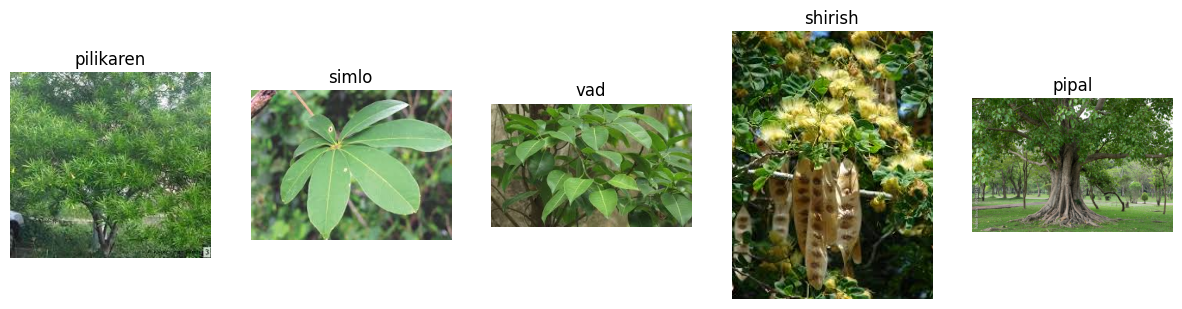

In [29]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)

In [33]:
image_shapes = []

for class_dir in class_dirs:
    folder_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(folder_path) and not class_dir.startswith('.'):
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            if os.path.isfile(img_path) and not img_file.startswith('.'):
                img = Image.open(img_path)
                image_shapes.append(img.size)

# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
print(shapes_df.head())


   Width  Height
0    233     216
1    259     194
2    274     184
3    259     194
4    259     194


In [17]:
image_shapes = []

for cls in os.listdir(repo_path):
    folder_path = os.path.join(repo_path, cls)
    if os.path.isdir(folder_path) and not cls.startswith('.'):
        for img_file in os.listdir(folder_path)[:10]:  # check first 10 from each class
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                h, w, c = img.shape
                image_shapes.append((h, w, c))

# Convert to NumPy array to get statistics
shape_array = np.array(image_shapes)

print("Image shape stats (from sample):")
print(f"Min Height x Width : {shape_array[:,0].min()} x {shape_array[:,1].min()}")
print(f"Max Height x Width : {shape_array[:,0].max()} x {shape_array[:,1].max()}")
print(f"Mean Height x Width: {shape_array[:,0].mean():.2f} x {shape_array[:,1].mean():.2f}")
print(f"Channels detected  : {np.unique(shape_array[:,2])}")

Image shape stats (from sample):
Min Height x Width : 148 x 158
Max Height x Width : 3000 x 4000
Mean Height x Width: 337.57 x 375.08
Channels detected  : [3]


In [32]:
print("\nImage shape stats (from all images):")
print(shapes_df.describe())


Image shape stats (from all images):
             Width       Height
count  1095.000000  1095.000000
mean    329.618265   280.960731
std     340.095855   318.949595
min     141.000000   130.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     276.000000   259.000000
max    4000.000000  4032.000000


In [36]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

for class_dir in class_dirs:
    folder_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(folder_path) and not class_dir.startswith('.'):
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            if os.path.isfile(img_path) and not img_file.startswith('.'):
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 60


In [37]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 2


Duplicate set 1:


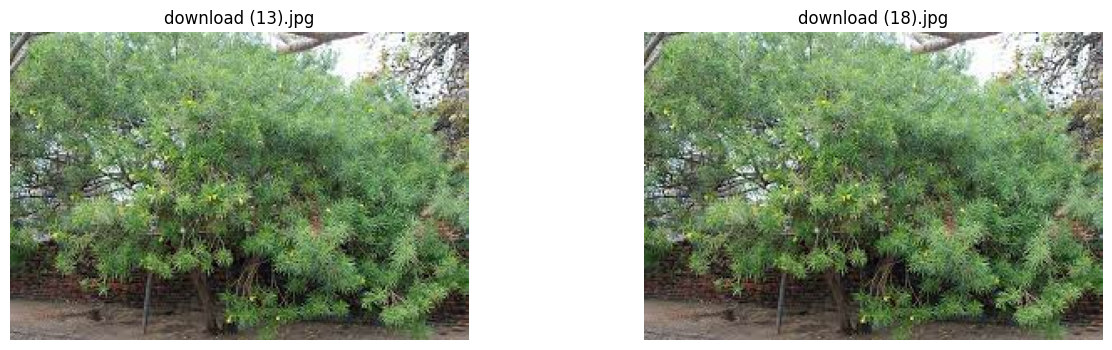

Duplicate set 2:


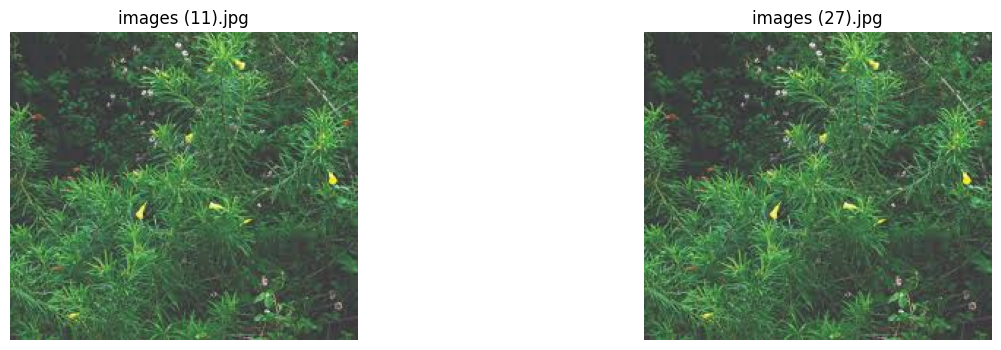

Duplicate set 3:


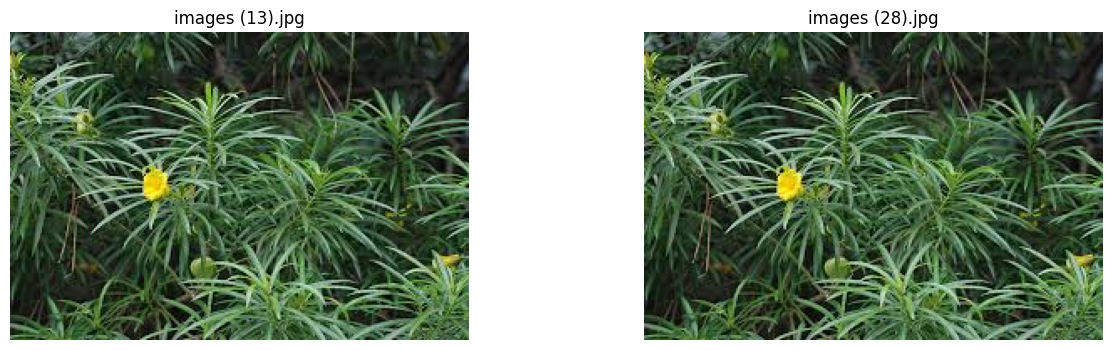

In [38]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [39]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 63 duplicate images.


In [41]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

for class_dir in class_dirs:
    folder_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(folder_path) and not class_dir.startswith('.'):
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            if os.path.isfile(img_path) and not img_file.startswith('.'):
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [42]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 9
🔺 Very large images: 33


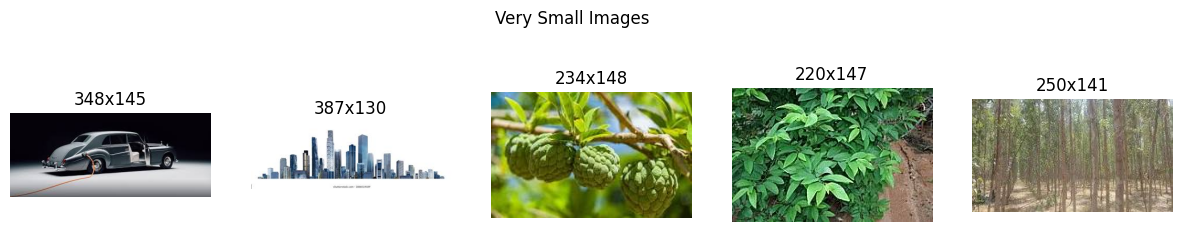

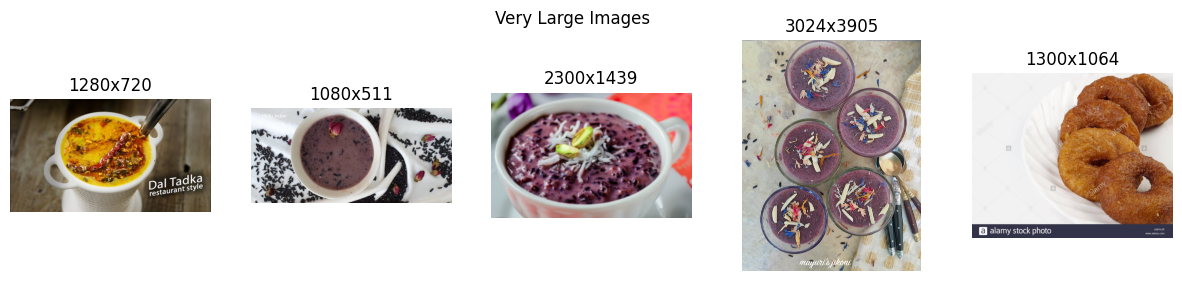

In [43]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [44]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 42 outlier images (small + large).


In [45]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count   990.000000   990.000000
mean    281.303030   239.705051
std     120.054525   112.706406
min     151.000000   151.000000
25%     225.000000   183.000000
50%     259.000000   195.000000
75%     275.000000   259.000000
max    1000.000000  1102.000000


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 801 images belonging to 31 classes.
Found 189 images belonging to 31 classes.


In [47]:

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [48]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.0784 - loss: 3.3411 - val_accuracy: 0.1323 - val_loss: 3.0513
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.1087 - loss: 3.1155 - val_accuracy: 0.0370 - val_loss: 3.0353
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.0880 - loss: 3.1335 - val_accuracy: 0.1323 - val_loss: 2.9980
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.0887 - loss: 3.1059 - val_accuracy: 0.1323 - val_loss: 2.9866
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.1138 - loss: 3.0565 - val_accuracy: 0.1323 - val_loss: 2.9981
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.0873 - loss: 3.0724 - val_accuracy: 0.1323 - val_loss: 3.0005
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.1230 - loss: 3.0277 - val_accuracy: 0.0423 - val_loss: 2.9937
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.0732 - loss: 3.0953 - val_accuracy: 0.1323 - val_loss

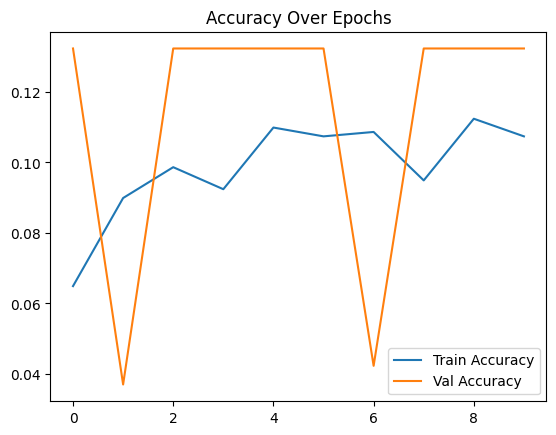

In [49]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")


Found 801 images belonging to 31 classes.
Found 189 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - accuracy: 0.1037 - loss: 3.9412 - val_accuracy: 0.1376 - val_loss: 2.9191
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.1496 - loss: 2.9442 - val_accuracy: 0.1587 - val_loss: 2.6862
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.1818 - loss: 2.6964 - val_accuracy: 0.2011 - val_loss: 2.8457
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.2329 - loss: 2.6146 - val_accuracy: 0.2751 - val_loss: 2.4877
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.2525 - loss: 2.4479 - val_accuracy: 0.2751 - val_loss: 2.3931
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.2479 - loss: 2.4052 - val_accuracy: 0.2275 - val_loss: 2.5915
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.2098 - loss: 2.5286 - val_accuracy: 0.2593 - val_loss: 2.5601
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.2131 - loss: 2.5753 - val_accuracy: 0.2857 - v

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


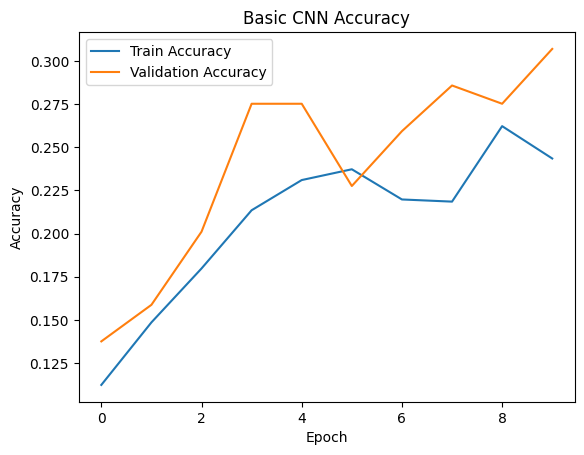

In [51]:

import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Use train_generator.num_classes for correct number of classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 161s 6s/step - accuracy: 0.1150 - loss: 5.3538 - val_accuracy: 0.0000e+00 - val_loss: 7.6502
Epoch 2/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 164s 6s/step - accuracy: 0.1905 - loss: 3.0791 - val_accuracy: 0.0000e+00 - val_loss: 15.4178
Epoch 3/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 173s 7s/step - accuracy: 0.1845 - loss: 2.8720 - val_accuracy: 0.0000e+00 - val_loss: 20.6613
Epoch 4/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 200s 7s/step - accuracy: 0.2269 - loss: 2.8133 - val_accuracy: 0.0000e+00 - val_loss: 23.2109
Epoch 5/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 175s 7s/step - accuracy: 0.2596 - loss: 2.6475 - val_accuracy: 0.0000e+00 - val_loss: 24.6634
Epoch 6/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 177s 7s/step - accuracy: 0.2644 - loss: 2.7811 - val_accuracy: 0.0000e+00 - val_loss: 25.4623
Epoch 7/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 173s 7s/step - accuracy: 0.2563 - loss: 2.6941 - val_accuracy: 0.0000e+00 - val_loss: 23.1774
Epoch 8/25
26/26 ━━━━━━━━━━━━━━━━━━━━ 199s 7s/step - accuracy: 0.2868 - loss: